In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tables import *
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA



## <div align="center">PCA</div>

In [93]:
# Here I assign height and width
image_height=12
image_width=120

# Assign tuple containing the image height and width.
image_shape=(image_height,image_width)

# Here I create  a string variable "datafilename" which contains the name of an HDF5 file
datafilename='A_challenge_8.hdf5'

In [94]:
# Read PCA dataset
ImagesFile = open_file(datafilename, mode = "r")
ImagesTable=ImagesFile.root.Images.Images

# Check out what kinds of data I have and it's shape
print(ImagesTable.shape)
print(type(ImagesTable))
print(ImagesTable)

(3000,)
<class 'tables.table.Table'>
/Images/Images (Table(3000,)) 'Images for A assignment'


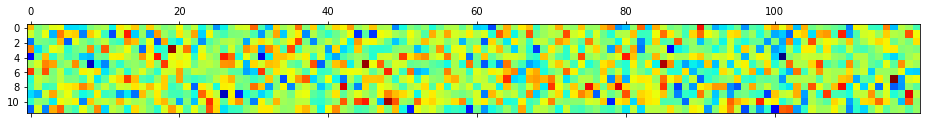

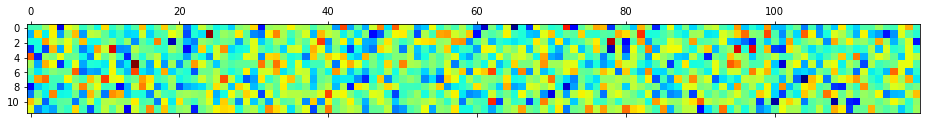

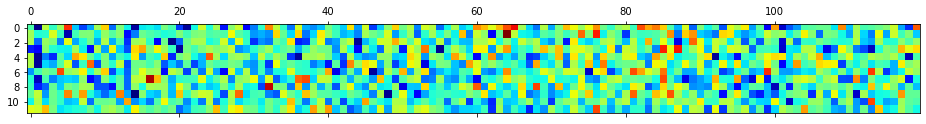

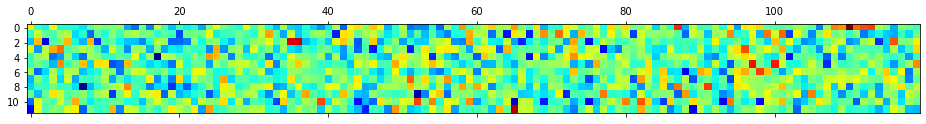

In [95]:
# Start and stop are specified here, you need to process entire dataset!
for x in ImagesTable.iterrows(0,4): 
    plt.matshow(x['image'], interpolation='nearest', cmap=cm.jet)
    plt.show()

In [96]:
# Read PCA dataset
ImagesFile = open_file(datafilename, mode = "r")

# ImagesTable object is a reference to the Images dataset within the file.
ImagesTable=ImagesFile.root.Images.Images

In [97]:
# Length is defined as the product of image_height and image_width,
# which represents the total number of pixels in an image. 
length = image_height * image_width
print(ImagesTable.shape[0])

# This is useful to know to ensure that the new array has the correct dimensions to store all the images.
number_of_images = ImagesTable.shape[0]

# new_array will be used to store the flattened representation of each image.
new_array = np.zeros((number_of_images, length))
print(new_array.shape)


3000
(3000, 1440)


(array([1.00000e+00, 3.00000e+00, 1.00000e+01, 1.50000e+01, 4.20000e+01,
        1.17000e+02, 3.13000e+02, 6.77000e+02, 1.66300e+03, 3.62800e+03,
        7.92400e+03, 1.62360e+04, 3.17800e+04, 5.80190e+04, 9.85690e+04,
        1.55784e+05, 2.29288e+05, 3.11480e+05, 3.89090e+05, 4.51795e+05,
        4.82747e+05, 4.76595e+05, 4.34185e+05, 3.64604e+05, 2.84531e+05,
        2.04589e+05, 1.35403e+05, 8.38010e+04, 4.77570e+04, 2.55640e+04,
        1.29600e+04, 6.00700e+03, 2.77900e+03, 1.22100e+03, 4.73000e+02,
        1.95000e+02, 9.60000e+01, 3.80000e+01, 1.20000e+01, 9.00000e+00]),
 array([-60.56210535, -57.6566089 , -54.75111245, -51.845616  ,
        -48.94011955, -46.0346231 , -43.12912665, -40.2236302 ,
        -37.31813375, -34.4126373 , -31.50714085, -28.6016444 ,
        -25.69614795, -22.79065149, -19.88515504, -16.97965859,
        -14.07416214, -11.16866569,  -8.26316924,  -5.35767279,
         -2.45217634,   0.45332011,   3.35881656,   6.26431301,
          9.16980946,  12.0753

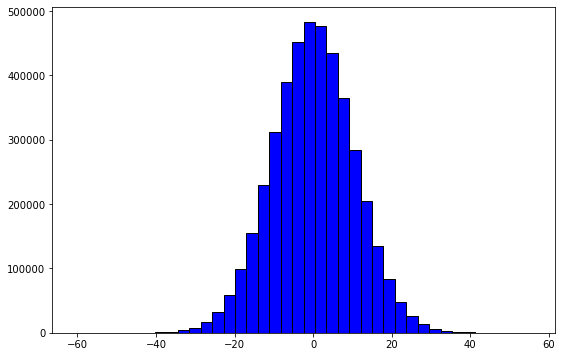

In [98]:
# I iterate over each row of the ImagesTable dataset. 
i=0
for unflattened_array in ImagesTable.iterrows():
    # This line flattens the 2D pixel array for the current image into a 1D array and stores it in the new_array variable. 
    new_array[i] = unflattened_array['image'].flatten()
    i=i+1
    
# This line flattens the 2D array new_array into a 1D array new_array_fl.
# This will be useful for visualizing the distribution of pixel values across all images.
new_array_fl = new_array.flatten()

# Plot histogram
plt.figure(figsize=(9,6))
plt.hist(new_array_fl, bins=40, color = 'blue', edgecolor = 'black')

## <div align="center">PCA or ICA ?!</div>

THe histogram is unimodal (single peak), the data is concentrated around a central value. I can define whether to use PCA or ICA by comparing the variance and reconstruction error.

In [99]:
# Perform PCA on the data

# Initialize PCA using sklearn library 
pca = PCA(n_components = 10)

# This applies the PCA analysis on the new_array and returns the transformed data in data_PCA variable. 
data_PCA = pca.fit_transform(new_array)
print(data_PCA.shape)

(3000, 10)


In [100]:
# Get the inverse matrix 
data_reconstructed = pca.inverse_transform(data_PCA)

# compute reconstruction error as mean squared error
reconstruction_error = np.mean((new_array - data_reconstructed)**2)

# compute variance of the original data
variance = np.var(new_array)
print("Variance of the original data:", variance)
print("Reconstruction error:", reconstruction_error)

# compare the reconstruction error to the variance
if reconstruction_error < variance:
    print("The reconstruction error is much smaller than the variance.")
else:
    print("The reconstruction error is close to or larger than the variance.")

Variance of the original data: 107.5533775587602
Reconstruction error: 98.88634260126479
The reconstruction error is much smaller than the variance.


#### Based on reconstruction error is much smaller than the variance I can conclude that PCA is good to go.

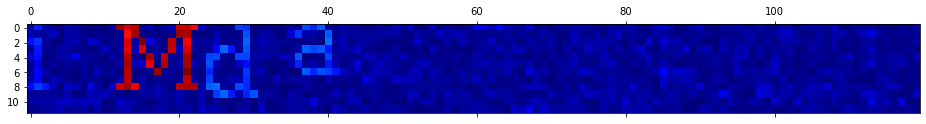

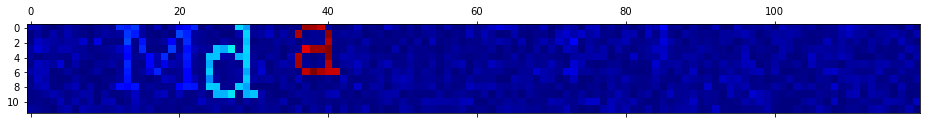

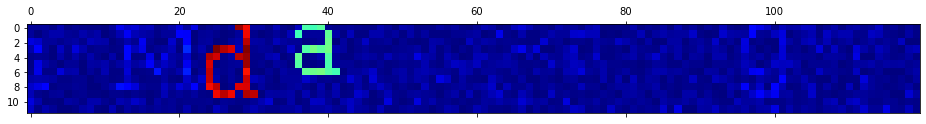

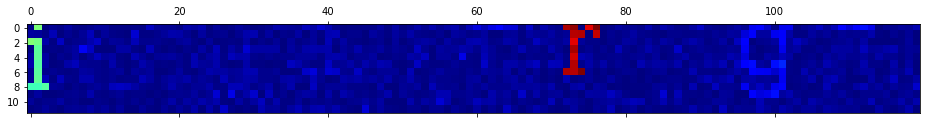

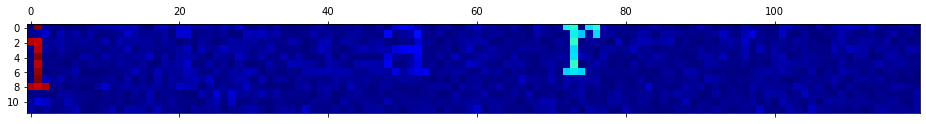

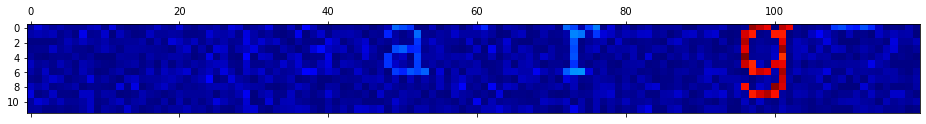

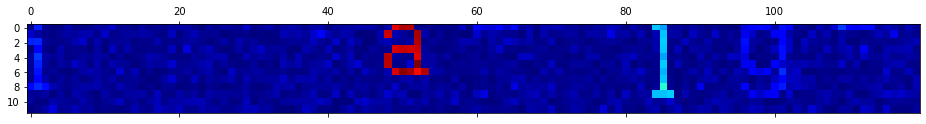

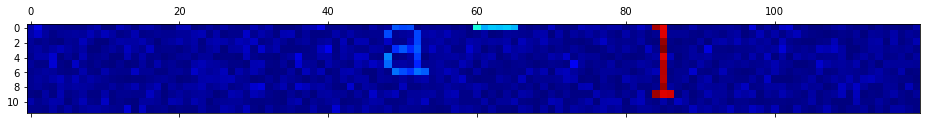

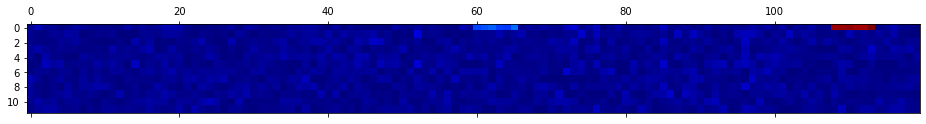

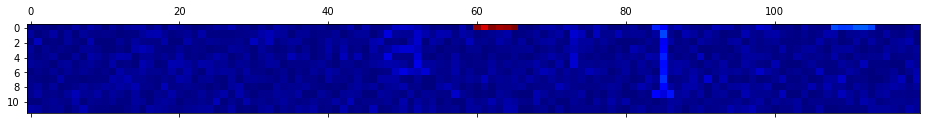

In [101]:
# Each iteration of the loop corresponds to a principal component. n_components = 10 that's why we iterate 10 times.
for k in range(0,10):
    # Here I compute principal component and reshapes it into a 2D image with the original dimensions image_height and image_width.
    output = np.abs(pca.components_[k,:]).reshape((image_height, image_width))
    # Plot the result
    plt.matshow(output, interpolation='nearest', cmap=cm.jet)
    plt.show()

The word that I got is - **MADRIGAL**